In [51]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import glob
import re
import stan
import arviz as az
import nest_asyncio
nest_asyncio.apply()

In [2]:
p_1_files = glob.glob(f'data_2016/*_0_*.csv')
p_2_files = glob.glob(f'data_2016/*_1_*.csv')
p_3_files = glob.glob(f'data_2016/*_2_*.csv')
p_4_files = glob.glob(f'data_2016/*_3_*.csv')
p_5_files = glob.glob(f'data_2016/*_4_*.csv')
p_6_files = glob.glob(f'data_2016/*_5_*.csv')
p_7_files = glob.glob(f'data_2016/*_6_*.csv')
p_8_files = glob.glob(f'data_2016/*_7_*.csv')
p_9_files = glob.glob(f'data_2016/*_8_*.csv')
p_10_files = glob.glob(f'data_2016/*_9_*.csv')

print(len(p_1_files))
print(len(p_2_files))
print(len(p_3_files))
print(len(p_4_files))
print(len(p_5_files))
print(len(p_6_files))
print(len(p_7_files))
print(len(p_8_files))
print(len(p_9_files))
print(len(p_10_files))

346
357
352
339
273
264
335
361
359
357


In [4]:
dfs_p1 = [pd.read_csv(filename) for filename in p_1_files]
dfs_p2 = [pd.read_csv(filename) for filename in p_2_files]
dfs_p3 = [pd.read_csv(filename) for filename in p_3_files]
dfs_p4 = [pd.read_csv(filename) for filename in p_4_files]
dfs_p5 = [pd.read_csv(filename) for filename in p_5_files]
dfs_p6 = [pd.read_csv(filename) for filename in p_6_files]
dfs_p7 = [pd.read_csv(filename) for filename in p_7_files]
dfs_p8 = [pd.read_csv(filename) for filename in p_8_files]
dfs_p9 = [pd.read_csv(filename) for filename in p_9_files]
dfs_p10 = [pd.read_csv(filename) for filename in p_10_files]

big_frame_p1 = pd.concat(dfs_p1, ignore_index=True)
big_frame_p2 = pd.concat(dfs_p2, ignore_index=True)
big_frame_p3 = pd.concat(dfs_p3, ignore_index=True)
big_frame_p4 = pd.concat(dfs_p4, ignore_index=True)
big_frame_p5 = pd.concat(dfs_p5, ignore_index=True)
big_frame_p6 = pd.concat(dfs_p6, ignore_index=True)
big_frame_p7 = pd.concat(dfs_p7, ignore_index=True)
big_frame_p8 = pd.concat(dfs_p8, ignore_index=True)
big_frame_p9 = pd.concat(dfs_p9, ignore_index=True)
big_frame_p10 = pd.concat(dfs_p10, ignore_index=True)

big_frame_list = [big_frame_p1, big_frame_p2, big_frame_p3, 
                     big_frame_p4, big_frame_p5, big_frame_p6, 
                     big_frame_p7, big_frame_p8, big_frame_p9, 
                     big_frame_p10]

In [12]:
ratio_RR_RI_response_list = []
for df in big_frame_list:
    resp_RI = df["resp_RI"]
    resp_RR = df["resp_RR"]

    ratio_RR_RI_response = np.log2(resp_RR.sum()/resp_RI.sum())    
    ratio_RR_RI_response_list.append(ratio_RR_RI_response)


print(ratio_RR_RI_response_list)

[1.4619868477788431, 1.5905130349457728, 1.6155857154233588, 1.6200886769611635, 1.5437840552907542, 1.730539612970746, 1.7073817968127976, 1.6887926904662416, 1.568450073397531, 1.374010884176483]


In [11]:
ratio_RR_RI_reward_list = []
for df in big_frame_list:
    reward_RI = df["reward_RI"]
    reward_RR = df["reward_RR"]

    ratio_RR_RI_reward = np.log2(reward_RR.sum()/( reward_RI.sum()))
    ratio_RR_RI_reward_list.append(ratio_RR_RI_reward)

print(ratio_RR_RI_reward_list)

[-0.32830922034052584, 0.2984898033852968, 0.8768978091349405, 1.5792937506344642, 2.070389327891398, 2.3179970432974475, 1.5861111433303117, 1.1007081198087694, 0.7219819798294462, -0.37550913509220635]


# Response

In [15]:
log_ratio_RR_RI_response_list = ratio_RR_RI_response_list
log_ratio_RR_RI_reward_list = ratio_RR_RI_reward_list

X = np.array(log_ratio_RR_RI_reward_list).reshape(-1, 1)
y = np.array(log_ratio_RR_RI_response_list)

reg = LinearRegression().fit(X, y)
sen = reg.coef_[0]
bias = np.exp2(reg.intercept_)

print(f"Sensitivity \n{sen:0.4f}")
print(f"Bias \n{bias:0.04f}")

Sensitivity 
0.0898
Bias 
2.8317


# Time

In [9]:
def get_times(l):
    visit_time = []
    for i in range(len(l)):

        if l[i] > l[i-1] and l[i+1] == 0:
            visit_time.append(l[i])
    
    return visit_time

In [10]:
list_times = []
list_rewards = []
count = 1

for df in big_frame_list:
    time_RI = df["visit_lenght_time_RI"].to_numpy()
    time_RR = df["visit_lenght_time_RR"].to_numpy()

    time_RI = np.append(time_RI, 0)
    time_RR = np.append(time_RR, 0)

    reward_RI_time = df["reward_RI"].to_numpy()
    reward_RR_time = df["reward_RR"].to_numpy()

    time_visit_RI = get_times(time_RI)
    time_visit_RR = get_times(time_RR)

    ratio_RR_RI_time = np.log2(np.sum(time_visit_RR)/np.sum(time_visit_RI))
    ratio_RR_RI_time_reward = np.log2(np.sum(reward_RR_time)/np.sum(reward_RI_time))

    list_times.append(ratio_RR_RI_time)
    list_rewards.append(ratio_RR_RI_time_reward)

    count += 1

list_times = np.array(list_times)
list_rewards = np.array(list_rewards)

print(list_times)
print(list_rewards)

[-0.05817758  0.33735148  0.47643611  0.88342949  0.30995139 -0.05431663
  1.59532485  1.39446237  0.82320476  0.70333235]
[-0.32830922  0.2984898   0.87689781  1.57929375  2.07038933  2.31799704
  1.58611114  1.10070812  0.72198198 -0.37550914]


In [13]:
X = list_rewards.reshape(-1, 1)
y = list_times

reg = LinearRegression().fit(X, y)
sen_t = reg.coef_[0]
bias_t = np.exp2(reg.intercept_)

print(f"Sensitivity, s: {sen_t:0.4f}")
print(f"Log-Bias, b: {bias_t:0.04f}")

Sensitivity, s: 0.0679
Log-Bias, b: 1.4889


In [16]:
# File to save
!mkdir Figures_2016
dir = 'Figures_2016/'

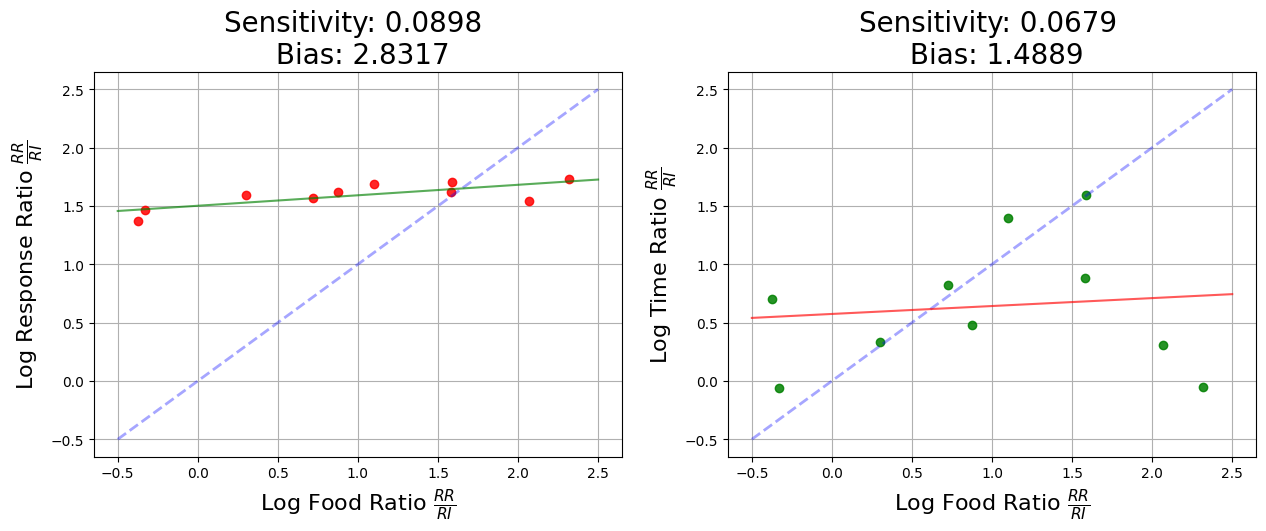

In [22]:
# Plot the Log food ratio vs Log response ratio  and log food ratio vs log time ratio and the
# estimated sensitivity and bias from the generalized matching law
x = np.linspace(-0.5,2.5,100)
fig, ax = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)

ax[0].plot(log_ratio_RR_RI_reward_list, log_ratio_RR_RI_response_list, 'o', alpha = 0.85, color = 'red')
ax[0].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[0].plot(x, x*sen + np.log2(bias), '-', alpha = 0.65, color = 'green', lw = 1.5)
ax[0].grid()
ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Sensitivity: {sen:0.4f} \n Bias: {bias:0.04f}", fontsize=20)

ax[1].plot(list_rewards, list_times, 'o', alpha = 0.85, color = 'green')
ax[1].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
ax[1].plot(x, x*sen_t + np.log2(bias_t), '-', alpha = 0.65, 
           color = 'red', lw = 1.5)
ax[1].grid()
ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Sensitivity: {sen_t:0.4f} \n Bias: {bias_t:0.04f}", fontsize=20)

plt.savefig(dir + 'Matching_2016.png', dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Matching Reinforcer by Reinforcer

In [23]:
print(big_frame_p1.shape)
print(big_frame_p2.shape)
print(big_frame_p3.shape)
print(big_frame_p4.shape)
print(big_frame_p5.shape)
print(big_frame_p6.shape)
print(big_frame_p7.shape)
print(big_frame_p8.shape)
print(big_frame_p9.shape)
print(big_frame_p10.shape)

(64468, 17)
(78755, 17)
(95141, 17)
(105577, 17)
(97168, 17)
(48558, 17)
(106866, 17)
(150925, 17)
(184359, 17)
(248288, 17)


In [24]:
# Check the number of rewards in each pair
print(big_frame_p1["reward_RI"].sum() + big_frame_p1["reward_RR"].sum())
print(big_frame_p2["reward_RI"].sum() + big_frame_p2["reward_RR"].sum())
print(big_frame_p3["reward_RI"].sum() + big_frame_p3["reward_RR"].sum())
print(big_frame_p4["reward_RI"].sum() + big_frame_p4["reward_RR"].sum())
print(big_frame_p5["reward_RI"].sum() + big_frame_p5["reward_RR"].sum())
print(big_frame_p6["reward_RI"].sum() + big_frame_p6["reward_RR"].sum())
print(big_frame_p7["reward_RI"].sum() + big_frame_p7["reward_RR"].sum())
print(big_frame_p8["reward_RI"].sum() + big_frame_p8["reward_RR"].sum())
print(big_frame_p9["reward_RI"].sum() + big_frame_p9["reward_RR"].sum())
print(big_frame_p10["reward_RI"].sum() + big_frame_p10["reward_RR"].sum())

3460
3570
3520
3390
2730
2640
3350
3610
3590
3570


In [25]:
# We create a new dataframe with the sum of the rewards for each pair (every df has aggregated information 
# of the pigeons and session that correspond the particular pair number).
new_big_df = {}
count = 0
for df in big_frame_list:
    new_df = df.copy()
    new_df["Sum_reward"] = new_df["reward_RI"] + new_df["reward_RR"]
    new_big_df[f"pair{count}"] = new_df
    count += 1

In [26]:
def get_index_number_reward(df: dict, number_reward:list) -> dict:
    """ 
    This function return the index where the n-th reward was obtained for a given pair, session and bird.

    The input is a dictionary with the dataframes for each pair.
    
    Return an python dictionary with the indices for each pair, session and bird.
    """
    
    index_dict = {}
    for dframe in df.keys():

        for session in df[dframe]["session"].unique():

            for bird in df[dframe][df[dframe]["session"] == session].bird.unique():

                index_list = []

                dataf = df[dframe][(df[dframe]["session"] == session) & (df[dframe]["bird"] == bird)].copy()
                dataf = dataf.reset_index(drop=True, inplace=False)
                
                pair = dataf.pair.unique()[0]
                rewards = dataf["Sum_reward"].to_numpy()
                cumsum_rewards = np.cumsum(rewards)

                for number in number_reward:
                    if number <= np.max(cumsum_rewards):
                        index = np.where(cumsum_rewards == number)[0][0]
                        index_list.append(index)
                    else:
                        pass
                
                index_dict[f"pair{pair}_session_{session}_bird_{bird}"] = index_list

    return index_dict

In [27]:
number_rewards = np.arange(1, 11)

index_dict = get_index_number_reward(new_big_df, number_rewards)
print(index_dict.keys())
print(len(index_dict.keys()))

dict_keys(['pair0_session_S109_bird_P875', 'pair0_session_S109_bird_P168', 'pair0_session_S109_bird_P796', 'pair0_session_S109_bird_P498', 'pair0_session_S109_bird_P787', 'pair0_session_S109_bird_P423', 'pair0_session_S59_bird_P787', 'pair0_session_S59_bird_P423', 'pair0_session_S59_bird_P796', 'pair0_session_S59_bird_P498', 'pair0_session_S59_bird_P875', 'pair0_session_S59_bird_P168', 'pair0_session_S81_bird_P168', 'pair0_session_S81_bird_P423', 'pair0_session_S81_bird_P498', 'pair0_session_S81_bird_P875', 'pair0_session_S81_bird_P787', 'pair0_session_S81_bird_P796', 'pair0_session_S103_bird_P423', 'pair0_session_S103_bird_P796', 'pair0_session_S103_bird_P168', 'pair0_session_S103_bird_P787', 'pair0_session_S103_bird_P875', 'pair0_session_S98_bird_P787', 'pair0_session_S98_bird_P796', 'pair0_session_S98_bird_P875', 'pair0_session_S98_bird_P423', 'pair0_session_S98_bird_P168', 'pair0_session_S86_bird_P423', 'pair0_session_S86_bird_P796', 'pair0_session_S86_bird_P168', 'pair0_session_S8

In [28]:
a = []
for key in index_dict.keys():
    a.append(len(index_dict[key]))

print(len(np.where(np.array(a) < 10)[0]))

0


In [37]:
index_dict["pair0_session_S109_bird_P168"]

[17, 39, 59, 82, 101, 124, 130, 151, 154, 164]

In [38]:
def get_data_between_rewards(df: pd.DataFrame,  pair: int, index_dict: dict, from_reward: int, to_reward: int) -> pd.DataFrame:
    """
    The function return a `pandas.DataFrame` with the data between the j-th y n-th reward for a given pair.

    Input is a dictionary with the indices for each pair, session and bird; the pair number, the j-th and n-th reward.

    Return a `pandas.DataFrame` with the data before the j-th y n-th reward for a given pair.
    """
    
    dfs = []
    pair_x_by_session_and_pigeon = []

    # Here we get the index for the n-th reward in each pair, session and pigeon.
    for i in index_dict.keys():
        exist_pair = re.findall(f'pair{pair}_\w+', i)

        if bool(exist_pair):
            pair_x_by_session_and_pigeon.extend(exist_pair)

    # Iteration over every session and pigeon for a given pair, and get the data between the j-th and n-th reward, to later concatenate all the dataframes.
    # The concatenation is done in order to get the data between the j-th and n-th reward for a given pair.
    
    for pair_session_bird in pair_x_by_session_and_pigeon:

        ses = re.findall(r"S\d+", pair_session_bird)[0]
        pigeon = re.findall(r"P\d+", pair_session_bird)[0]

        if len(index_dict[pair_session_bird]) < 10: 

            continue
        
        else:
            
            if to_reward == 1 and from_reward == 0:
                to_x_reinforcement = index_dict[pair_session_bird][0] - 1
                
                n = df[(df["session"] == ses) & (df["bird"] == pigeon)].copy()
                
                n.reset_index(inplace=True)
                
                n_final = n.loc[:to_x_reinforcement].copy()

                dfs.append(n_final)

            else:
                from_x_reinforcement = index_dict[pair_session_bird][from_reward-1] + 1
                to_x_reinforcement = index_dict[pair_session_bird][to_reward-1] - 1

                        
                n = df[(df["session"] == ses) & (df["bird"] == pigeon)].copy()
                
                n.reset_index(inplace=True)
                
                n_final = n.loc[from_x_reinforcement:to_x_reinforcement].copy()

                dfs.append(n_final)

            df_concat = pd.concat(dfs, ignore_index=True)

    return df_concat

In [33]:
from_reward = np.arange(0, 10)
to_reward = np.arange(1, 11)

pairs = np.arange(0, 10)

print(pairs)
print(from_reward)
print(to_reward)

[0 1 2 3 4 5 6 7 8 9]
[0 1 2 3 4 5 6 7 8 9]
[ 1  2  3  4  5  6  7  8  9 10]


In [40]:
ratios = {}
ratios_time = {}

for pair in pairs:
    
    ratio_list_RL = []
    ratio_list_RL_time = []

    for from_r, to_r in zip(from_reward, to_reward):
        
        df = get_data_between_rewards(new_big_df[f"pair{pair}"], pair, index_dict, from_r, to_r)

        time_RI = df["visit_lenght_time_RI"].to_numpy()
        time_RR = df["visit_lenght_time_RR"].to_numpy()

        time_RI = np.append(time_RI, 0)
        time_RR = np.append(time_RR, 0)

        time_visit_RI = get_times(time_RI)
        time_visit_RR = get_times(time_RR)

        ratio_LR = np.log2(df["resp_RR"].sum() / df["resp_RI"].sum())
        ratio_LR_time = np.log2(np.sum(time_visit_RR)/np.sum(time_visit_RI))

        ratio_list_RL.append(ratio_LR)
        ratio_list_RL_time.append(ratio_LR_time)

    ratios[f"pair{pair}_from0_to_10"] = ratio_list_RL
    ratios_time[f"pair{pair}_from0_to_10"] = ratio_list_RL_time

In [42]:
response_evolution = []
time_evolution = []

for i in range(10):
    mini_list = []
    for key in ratios.keys():
        mini_list.append(ratios[key][i])
    response_evolution.append(mini_list)

for i in range(10):
    mini_list_t = []
    for key_t in ratios_time.keys():
        mini_list_t.append(ratios_time[key_t][i])
    time_evolution.append(mini_list_t)

# Plots

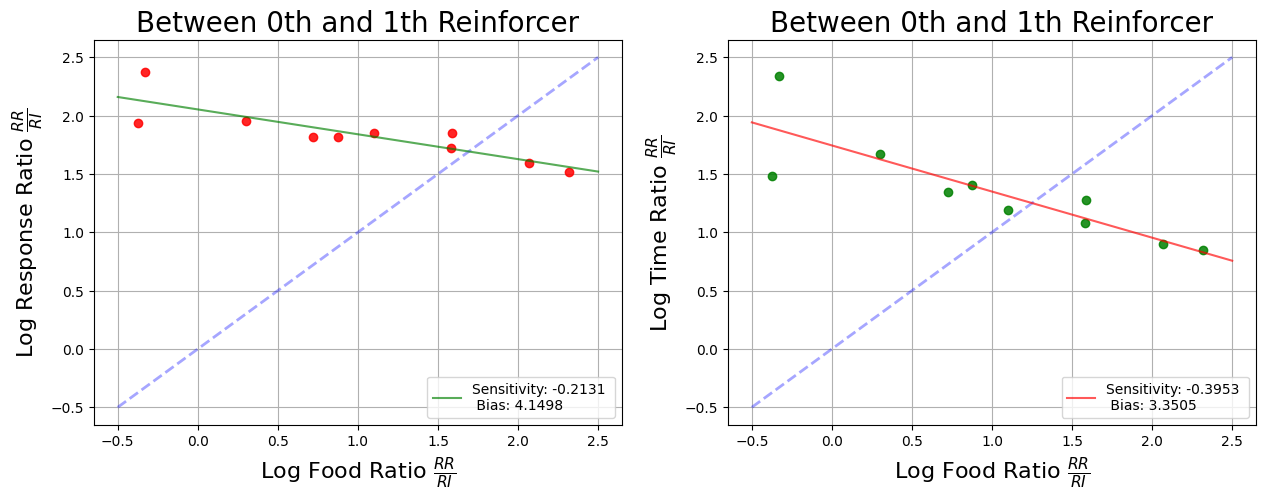

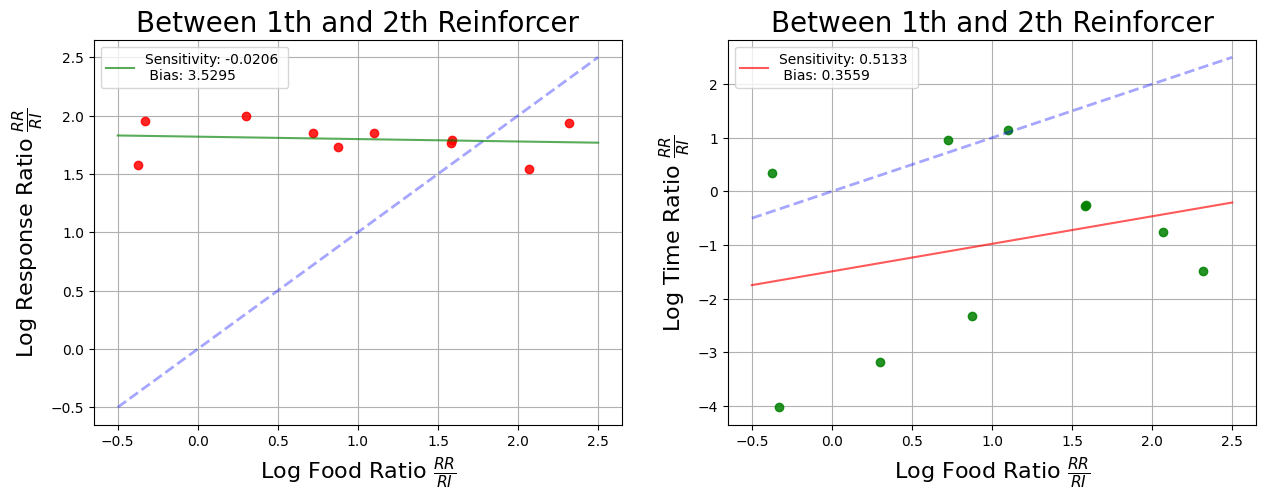

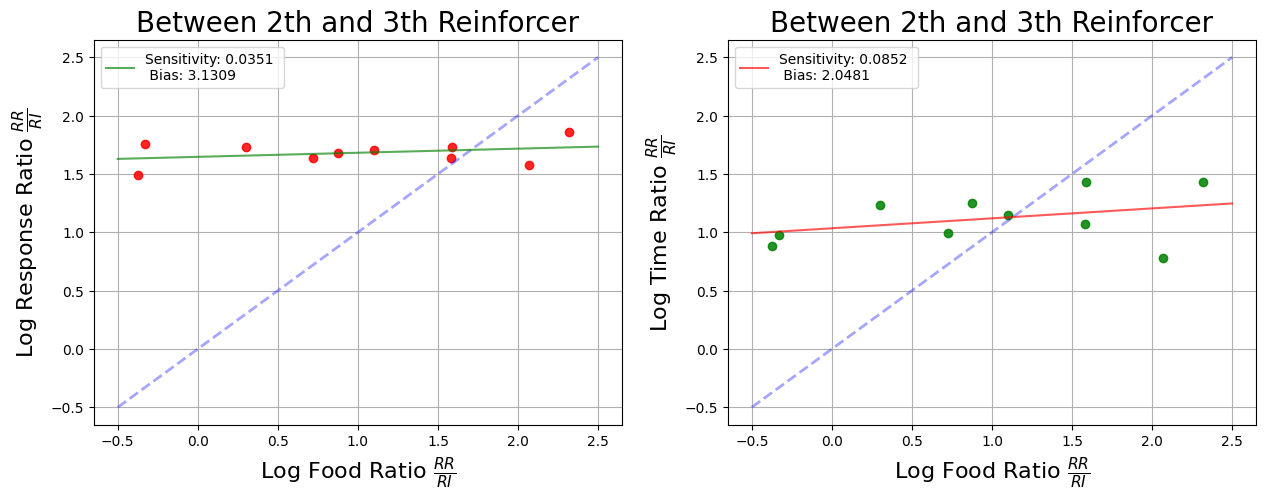

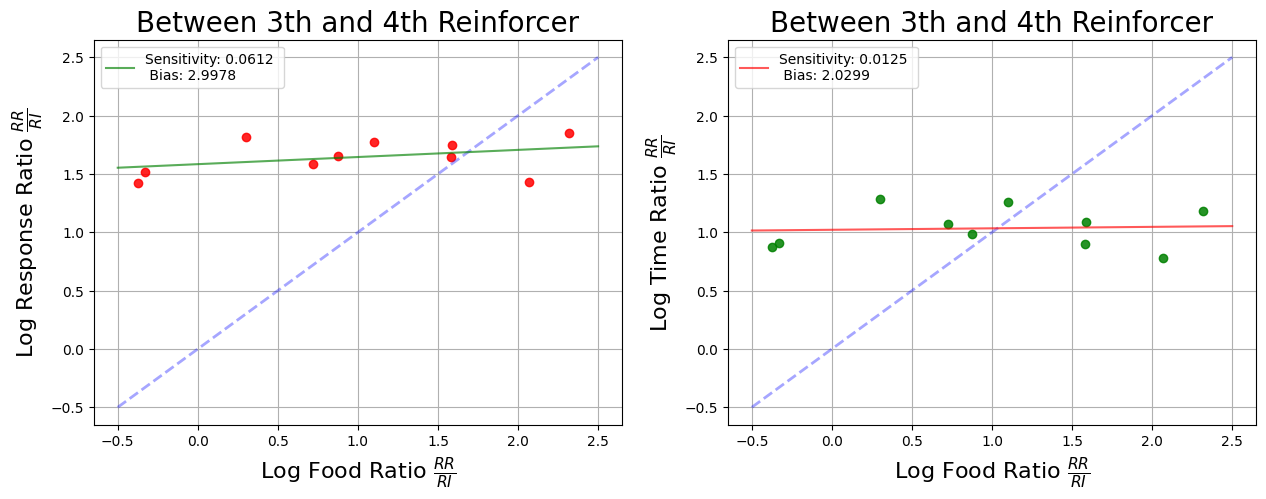

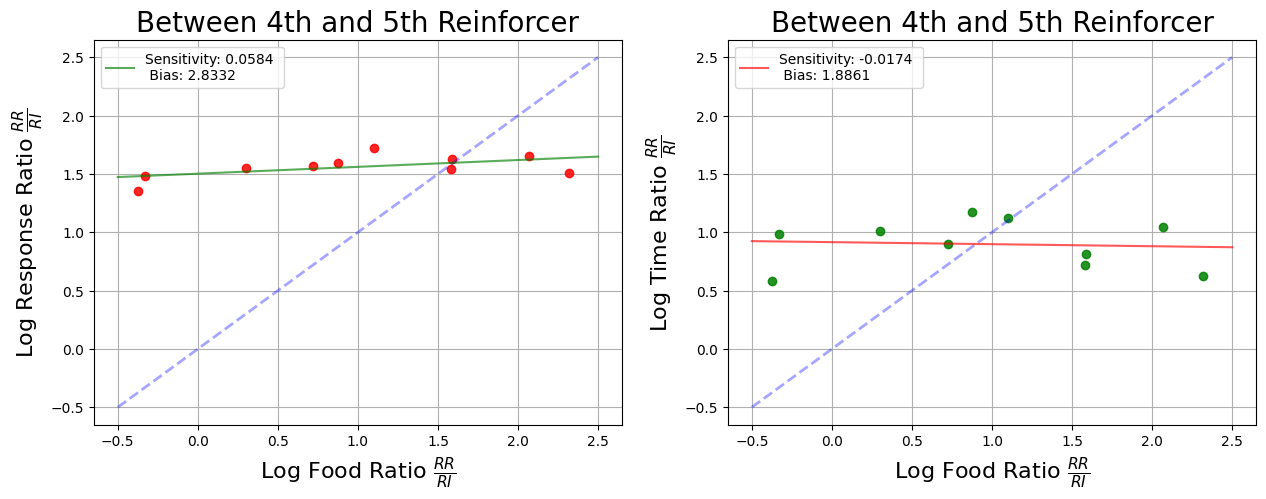

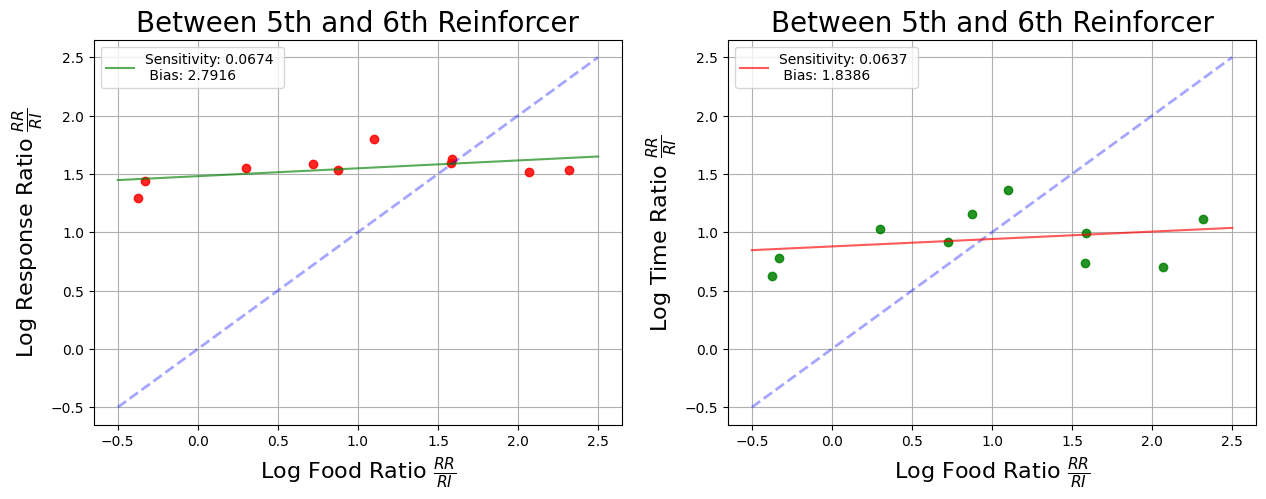

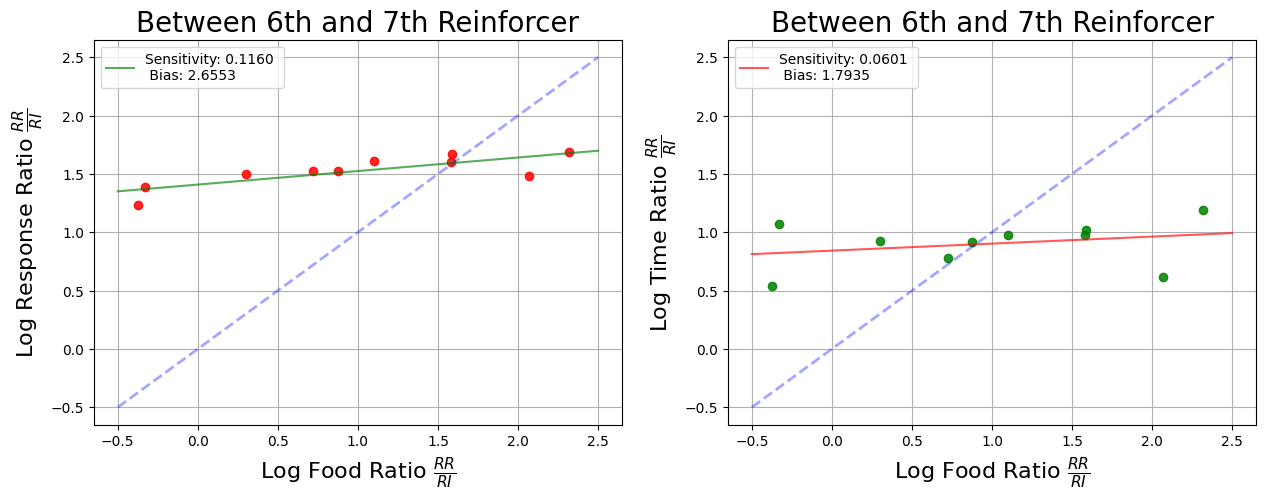

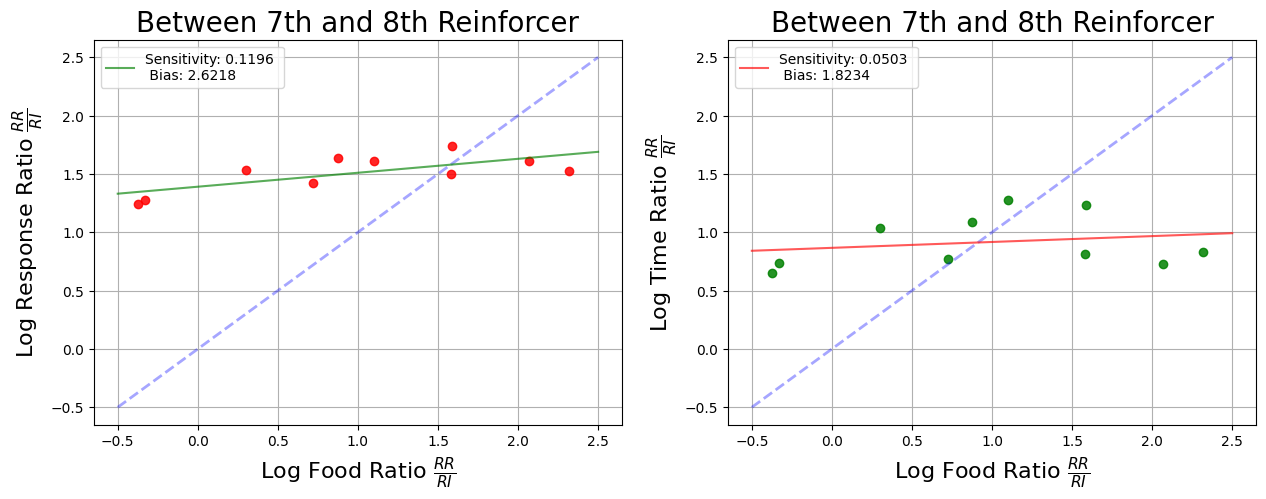

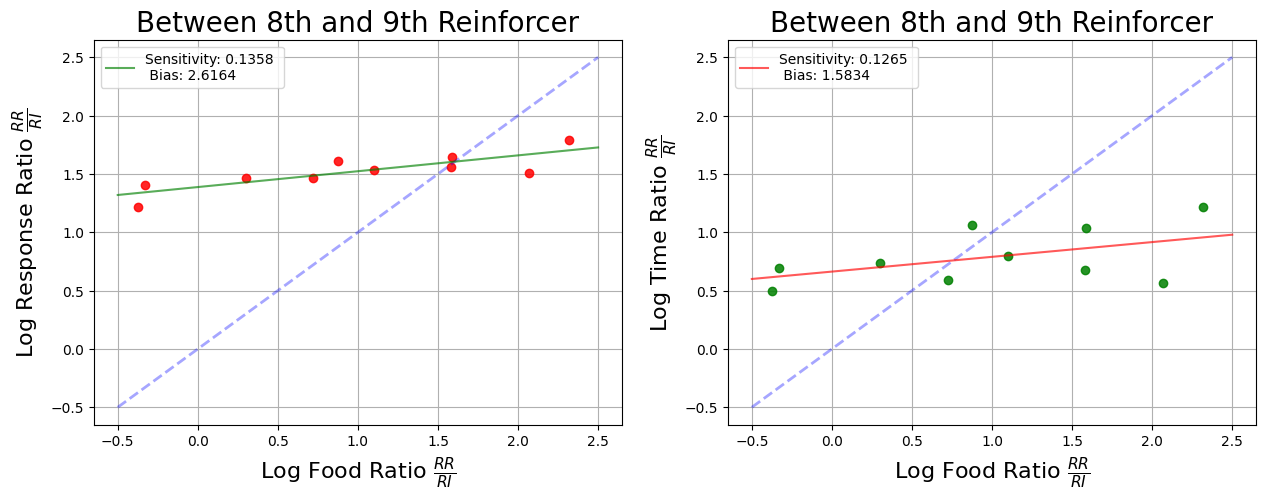

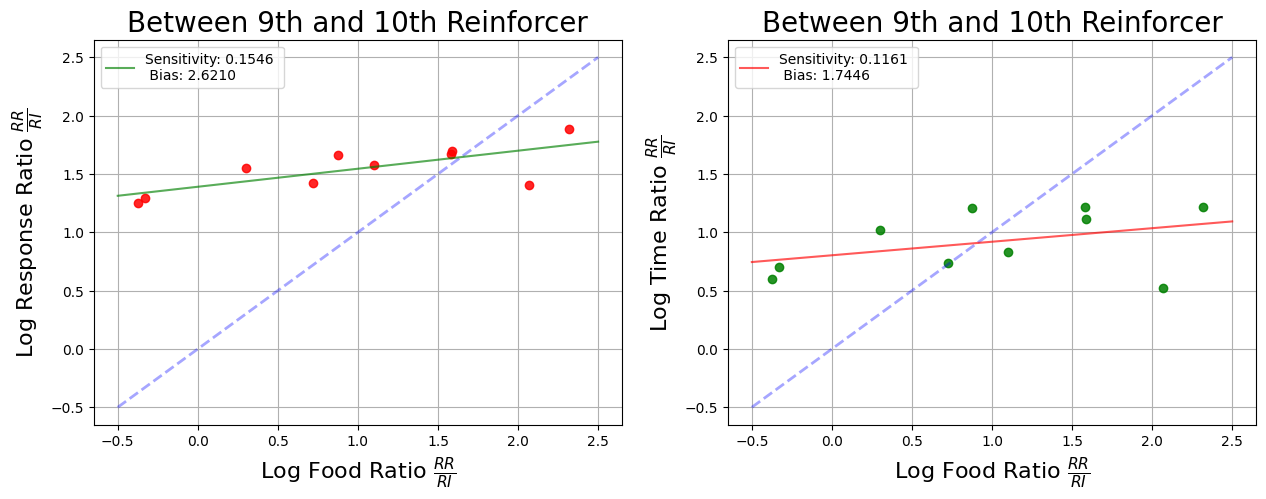

In [46]:
# Plot the Log food ratio vs Log response ratio  and log food ratio vs log time ratio and the
# estimated sensitivity and bias from the generalized matching law
count = 0
X = list_rewards.reshape(-1, 1)
x = np.linspace(-0.5,2.5,100)

for i in range(10):
    fig, ax = plt.subplots(figsize = (15, 5), ncols=2, nrows=1)

    y = response_evolution[count]
    reg = LinearRegression().fit(X, y)
    sen_t = reg.coef_[0]
    bias_t = reg.intercept_


    ax[0].plot(list_rewards, response_evolution[count], 'o', alpha = 0.85, color = 'red')
    ax[0].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
    ax[0].plot(x, x*sen_t + bias_t, '-', alpha = 0.65, 
               color = 'green', lw = 1.5, label=f"Sensitivity: {sen_t:0.4f} \n Bias: {np.exp2(bias_t):0.04f}")
    ax[0].grid()

    ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[0].set_title(f"Between {from_reward[count]}th and {to_reward[count]}th Reinforcer", fontsize=20)
    ax[0].legend()

    ######################################################################################
    ######################################################################################

    y = time_evolution[count]
    reg = LinearRegression().fit(X, y)
    sen_t_2 = reg.coef_[0]
    bias_t_2 = reg.intercept_

    ax[1].plot(list_rewards, time_evolution[count], 'o', alpha = 0.85, color = 'green')
    
    ax[1].plot(x, x, '--', alpha = 0.35, color = 'blue', lw = 2)
    
    ax[1].plot(x, x*sen_t_2 + bias_t_2, '-', alpha = 0.65, 
               color = 'red', lw = 1.5, 
               label = f"Sensitivity: {sen_t_2:0.4f} \n Bias: {np.exp2(bias_t_2):0.04f}")

    ax[1].grid()

    ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
    ax[1].set_title(f"Between {from_reward[count]}th and {to_reward[count]}th Reinforcer", fontsize=20)
    ax[1].legend()

    count += 1
    
    plt.savefig(dir + f"Figure_from{from_reward[count-1]}th_to_{to_reward[count-1]}th.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
    plt.show()

## Bias and Sensitivity Evolution

In [47]:
bias_evolution_response = []
sensitivity_evolution_response = []

bias_evolution_time = []
sensitivity_evolution_time = []

X = list_rewards.reshape(-1, 1)


for i in range(10):
    y_r = response_evolution[i]
    y_t = time_evolution[i]

    reg_r = LinearRegression().fit(X, y_r)
    reg_t = LinearRegression().fit(X, y_t)
    sen_r = reg_r.coef_[0]
    sen_t = reg_t.coef_[0]
    bias_r = np.exp2(reg_r.intercept_)
    bias_t = np.exp2(reg_t.intercept_)

    bias_evolution_response.append(bias_r)
    sensitivity_evolution_response.append(sen_r)
    bias_evolution_time.append(bias_t)
    sensitivity_evolution_time.append(sen_t)

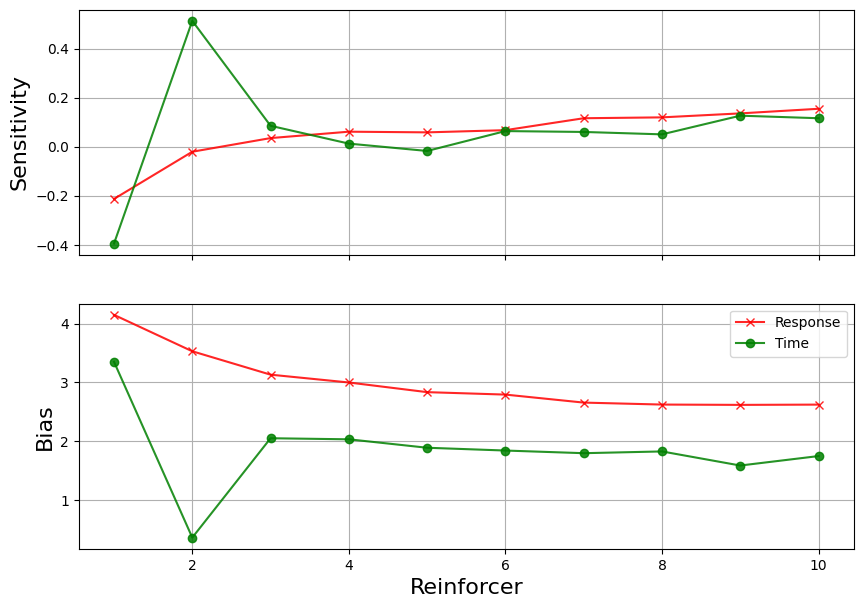

In [50]:
fig, ax = plt.subplots(figsize = (10, 7), ncols=1, nrows=2, sharex=True)
x = np.arange(1, 11, 1)
ax[0].plot(x, sensitivity_evolution_response, '-x', alpha = 0.85, color = 'red', label = 'Response')
ax[0].plot(x, sensitivity_evolution_time, '-o', alpha = 0.85, color = 'green', label = 'Time')

ax[0].grid()

ax[0].set_ylabel(r'Sensitivity', fontsize=16)

########################################################################################################################################################

ax[1].plot(x, bias_evolution_response, '-x', alpha = 0.85, color = 'red', label = 'Response')
ax[1].plot(x, bias_evolution_time, '-o', alpha = 0.85, color = 'green', label = 'Time')

ax[1].grid()

ax[1].set_xlabel(r'Reinforcer', fontsize=16)
ax[1].set_ylabel(r'Bias', fontsize=16)

plt.legend()
plt.savefig(dir + f"Figure_bias_sensitivity.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

# Bayesian Linear Regression

## Linear Regression from 0th to 10th reinforcer

In [52]:
model = """
data{
    int<lower = 0> N;  // Number of Observations
    vector[N] x; // Features;
    vector[N] y; // Targets;
}
parameters{
  real b0; // Intercept
  real b1; // Slope

  real<lower=0> sigma;  // error scale

}

model{

// Priors Slope and Intercept
    b0 ~ normal(0, 10); // Intercept
    b1 ~ normal(0, 10); // Slope

//Prior SD
    sigma ~ lognormal(0, 1);

// Likelihood
    y ~ normal(b0 + x * b1, sigma);
}

generated quantities{
    vector[N] log_lik;
    vector[N] y_hat;

    for (i in 1:N){
        log_lik[i] = normal_lpdf(y[i] | b0 + b1 * x[i], sigma);
        y_hat[i] = normal_rng(b0 + b1 * x[i], sigma);
    }
}
"""

In [53]:
data_model_responses = {"N": len(list_rewards), 
              "x": list_rewards,
              "y": ratio_RR_RI_response_list}

data_model_time = {"N": len(list_rewards), 
              "x": list_rewards,
              "y": list_times}

In [54]:
stan_model_responses = stan.build(model, data=data_model_responses, random_seed=140801)
stan_model_time = stan.build(model, data=data_model_time, random_seed=101401)

Building...



Building: found in cache, done.

Building...



Building: found in cache, done.

In [55]:
fit = stan_model_responses.sample(num_chains=4, num_samples=70000, num_warmup=55000)
fit_time = stan_model_time.sample(num_chains=4, num_samples=70000, num_warmup=55000)

Sampling:   0%
Sampling:  25% (125000/500000)
Sampling:  50% (250000/500000)
Sampling:  75% (375000/500000)
Sampling: 100% (500000/500000)
Sampling: 100% (500000/500000), done.
Messages received during sampling:
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 8e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.08 seconds.
  Adjust your expectations accordingly!
  Gradient evaluation took 7e-06 seconds
  1000 transitions using 10 leapfrog steps per transition would take 0.07 seconds.
  Adjust your expectations accordingly!
Sampling:   0%
Sampling:  25% (125000/500000)
Sampling:  50% (250000/500000)
Sampling:  75% (375000/500000)
Sampling: 100% (500000/5

In [56]:
bayes = fit.to_frame()
para_list_names = bayes.columns[7:10]
print(para_list_names)
bayes.head()

Index(['b0', 'b1', 'sigma'], dtype='object', name='parameters')


parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,b0,b1,sigma,...,y_hat.1,y_hat.2,y_hat.3,y_hat.4,y_hat.5,y_hat.6,y_hat.7,y_hat.8,y_hat.9,y_hat.10
draws,,,,,,,,,,,,,,,,,,,,,
0,16.559704,0.986693,0.392623,2.0,7.0,0.0,-16.066251,1.510863,0.073723,0.062500,...,1.537368,1.579980,1.636531,1.649949,1.652414,1.723573,1.511813,1.705215,1.560680,1.579419
1,17.035544,0.977341,0.343520,2.0,7.0,0.0,-16.660459,1.531439,0.077760,0.076092,...,1.591736,1.588547,1.487496,1.703611,1.768962,1.590524,1.564777,1.547127,1.565525,1.461108
2,12.922695,0.984114,0.331010,3.0,11.0,0.0,-12.627671,1.374933,0.182807,0.097175,...,1.418668,1.484988,1.481086,1.759639,1.687659,1.610440,1.571496,1.684649,1.559248,1.193220
3,14.428168,0.999771,0.409003,2.0,7.0,0.0,-13.891228,1.421520,0.169357,0.135181,...,1.364204,1.584835,1.485328,1.772658,1.932466,1.887338,1.745766,1.747791,1.265152,1.456742
4,15.386775,0.859354,0.392623,2.0,3.0,0.0,-15.068434,1.530927,0.080342,0.055778,...,1.600217,1.527312,1.551323,1.713516,1.706994,1.820152,1.662438,1.554514,1.678942,1.535539


In [58]:
bayes_time = fit_time.to_frame()
bayes_time.head()

parameters,lp__,accept_stat__,stepsize__,treedepth__,n_leapfrog__,divergent__,energy__,b0,b1,sigma,...,y_hat.1,y_hat.2,y_hat.3,y_hat.4,y_hat.5,y_hat.6,y_hat.7,y_hat.8,y_hat.9,y_hat.10
draws,,,,,,,,,,,,,,,,,,,,,
0,-0.195301,0.992896,0.426329,2.0,7.0,0.0,0.572112,0.673882,-0.103003,0.626605,...,0.064547,0.931888,1.283737,-0.054541,0.528915,0.503077,1.181459,0.855862,0.094806,1.276951
1,-0.252404,1.000000,0.415515,3.0,15.0,0.0,1.190199,0.290228,0.249756,0.595566,...,0.829675,0.707875,0.141595,0.407914,1.144499,1.449024,0.918540,0.057313,0.064912,-0.668093
2,-5.561486,0.975255,0.411593,2.0,7.0,0.0,9.127438,0.204701,0.513126,1.419654,...,-0.690597,3.100955,-0.829005,4.417611,-0.501946,3.503936,-2.074283,1.490797,-2.454133,0.609906
3,-0.477634,0.954657,0.416556,2.0,7.0,0.0,1.501943,0.343946,0.124972,0.685151,...,0.240821,1.114999,2.027718,-0.196084,0.405742,0.474491,1.516086,0.082663,-0.069730,-0.280226
4,-0.205586,0.973873,0.426329,2.0,3.0,0.0,0.601279,0.746191,-0.137964,0.586780,...,0.876481,0.760726,0.534022,-0.462124,-0.352433,0.315589,-0.299107,0.970020,1.026311,1.003336


## MCMC Diagnostics

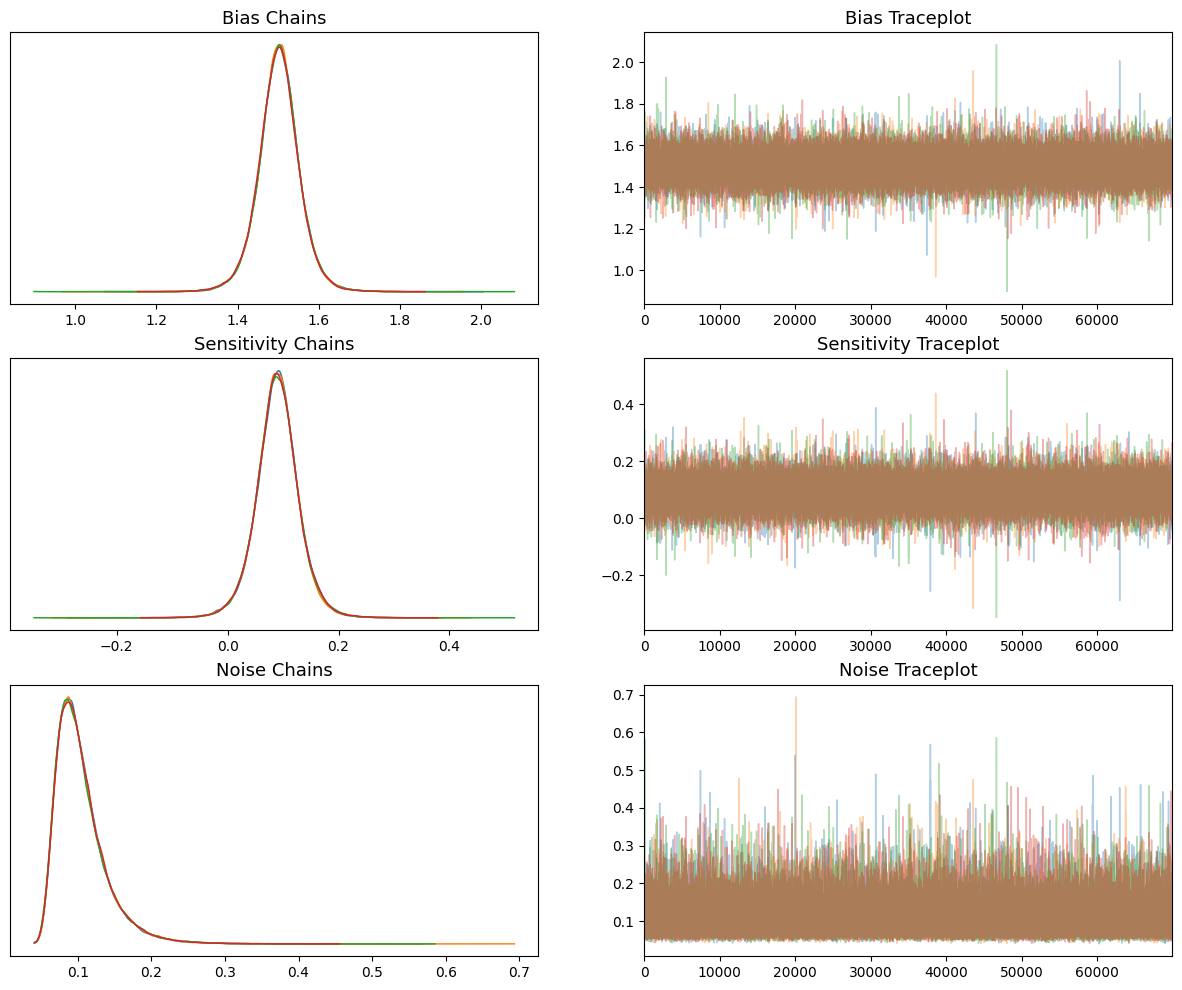

In [60]:
axes1 = az.plot_trace(fit, var_names=para_list_names_time, compact=False, figsize=(15, 12),
                     combined= False)

axes1[0,0].set_title("Bias Chains", fontsize=13)
axes1[0,1].set_title("Bias Traceplot", fontsize=13)
axes1[1,0].set_title("Sensitivity Chains", fontsize=13)
axes1[1,1].set_title("Sensitivity Traceplot", fontsize=13)
axes1[2,0].set_title("Noise Chains", fontsize=13)
axes1[2,1].set_title("Noise Traceplot", fontsize=13)

plt.savefig(dir + "Traceplot_responses_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

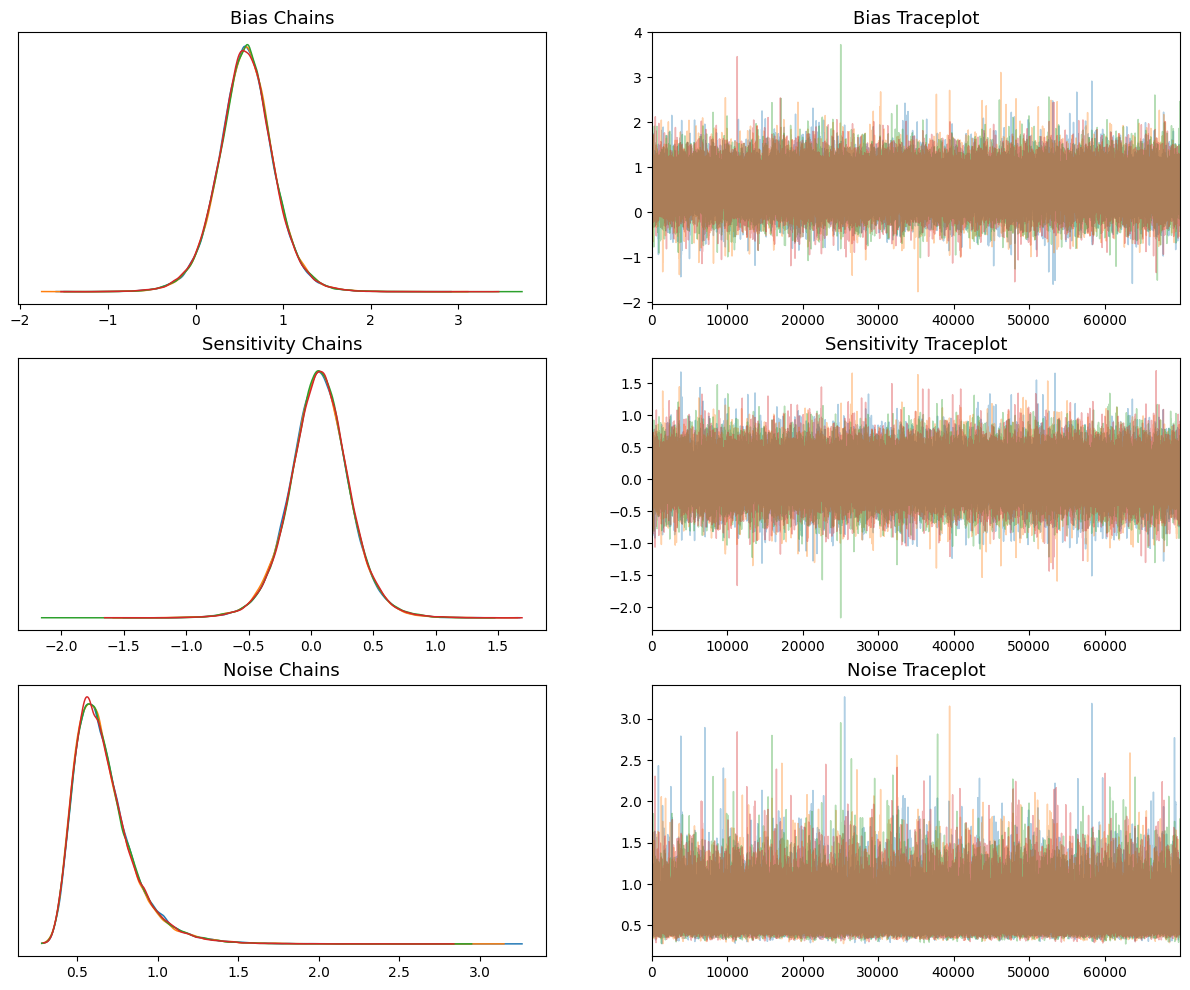

In [62]:
axes1 = az.plot_trace(fit_time, var_names=para_list_names, compact=False, figsize=(15, 12),
                     combined= False)

axes1[0,0].set_title("Bias Chains", fontsize=13)
axes1[0,1].set_title("Bias Traceplot", fontsize=13)
axes1[1,0].set_title("Sensitivity Chains", fontsize=13)
axes1[1,1].set_title("Sensitivity Traceplot", fontsize=13)
axes1[2,0].set_title("Noise Chains", fontsize=13)
axes1[2,1].set_title("Noise Traceplot", fontsize=13)

plt.savefig(dir + "Traceplot_time_2022.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

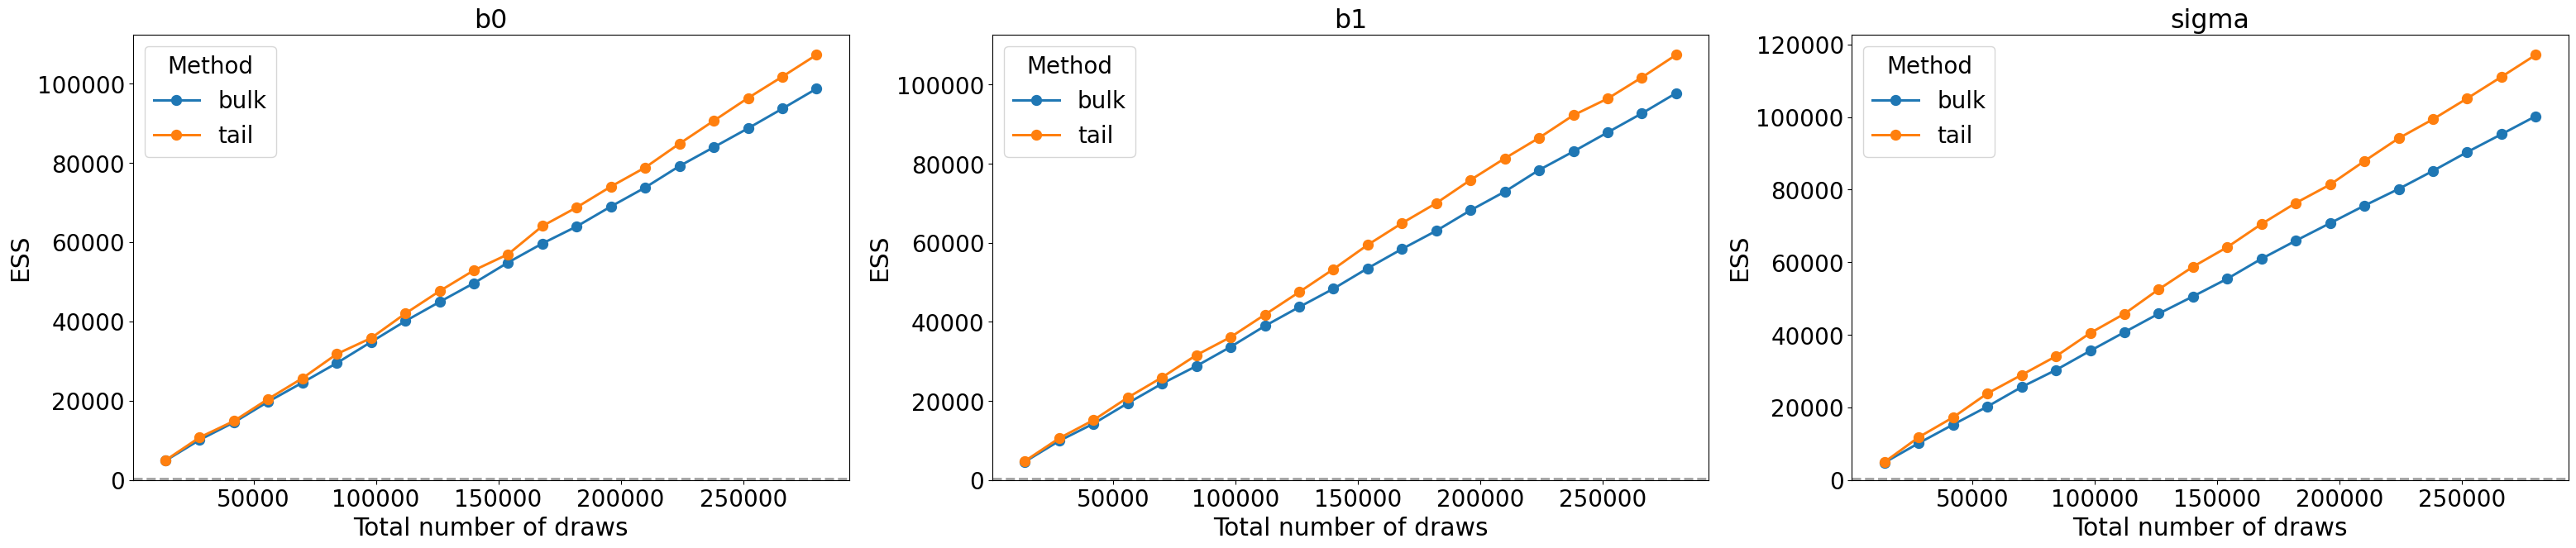

In [63]:
az.plot_ess(fit, var_names=para_list_names_time, figsize=(38, 7), 
            kind="evolution", relative=False, textsize=20)

plt.savefig(dir + "Effective_Sample_Size_Responses.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)

plt.show()

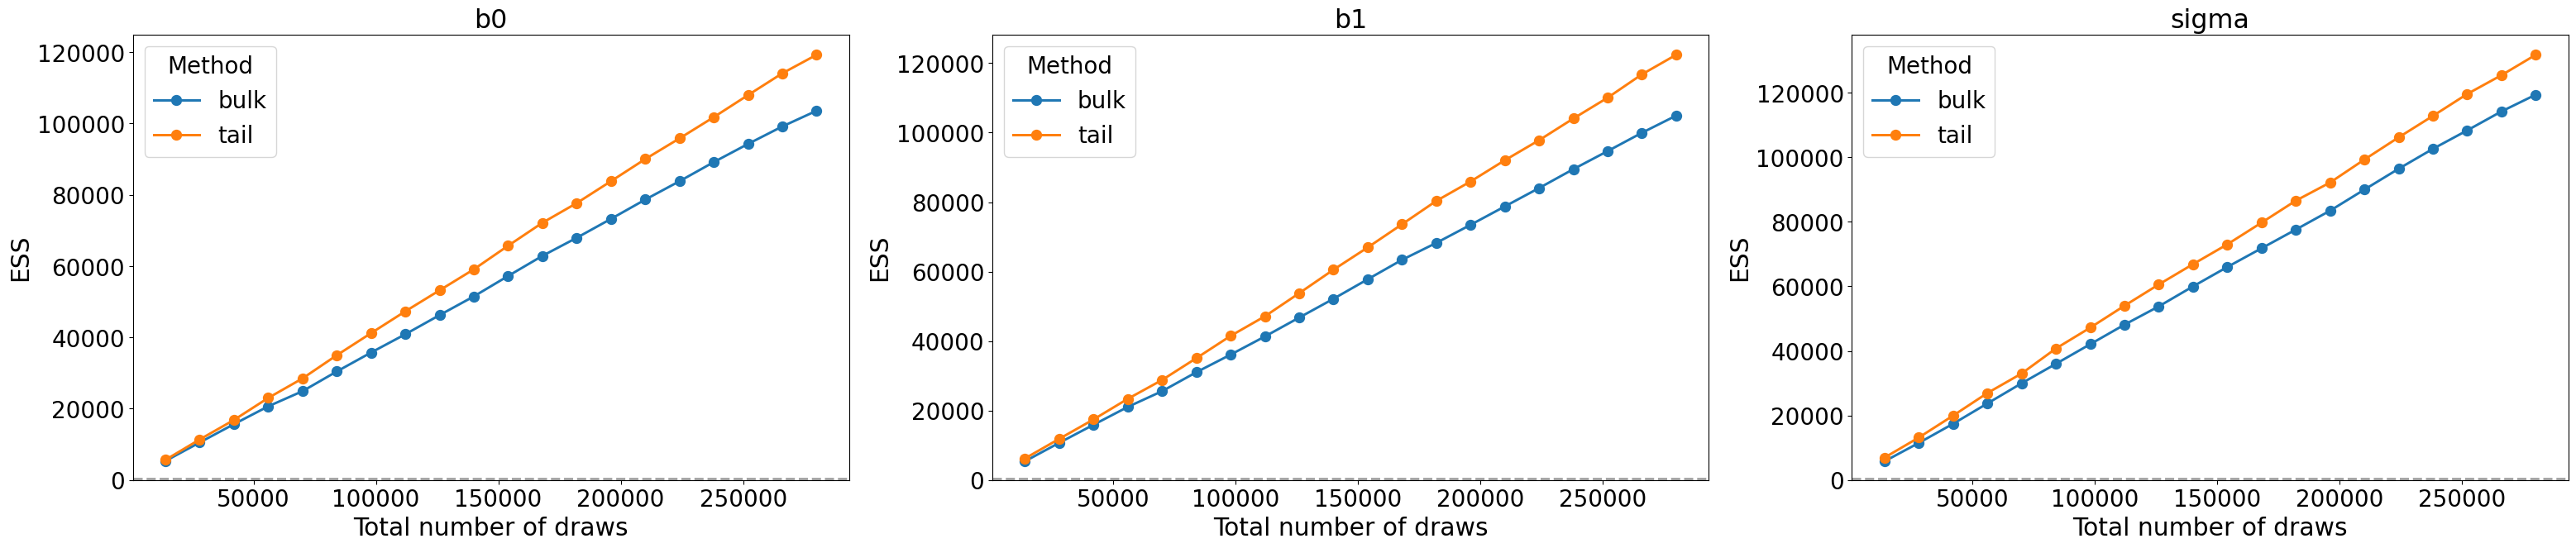

In [64]:
az.plot_ess(fit_time, var_names=para_list_names, figsize=(38, 7), 
            kind="evolution", relative=False, textsize=20)

plt.savefig(dir + "Effective_Sample_Size_Responses.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)

plt.show()

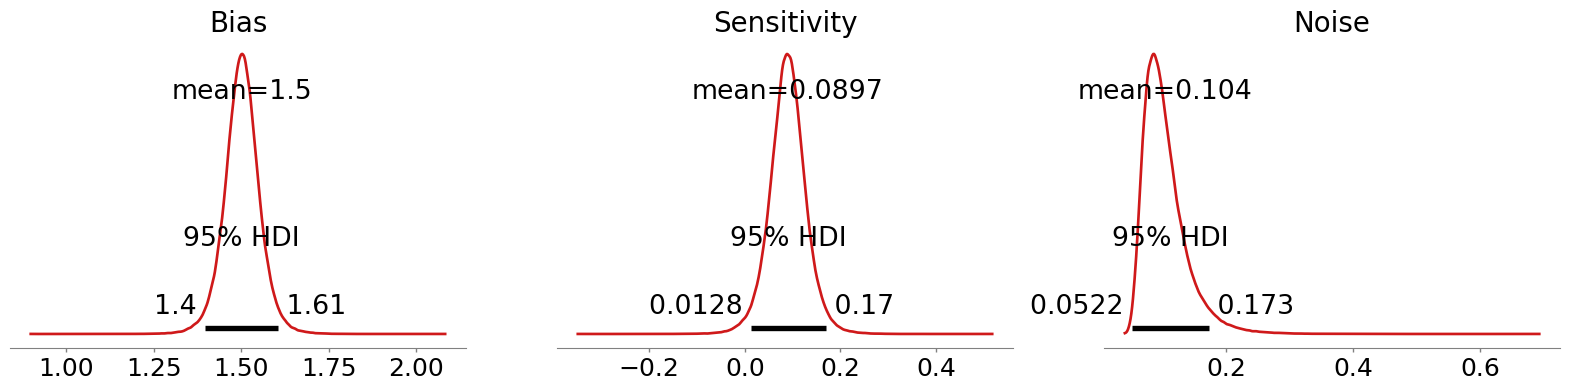

In [65]:
axes = az.plot_posterior(fit, var_names=para_list_names, figsize=(20, 4), kind='kde',
                        hdi_prob=0.95, textsize=18, point_estimate='mean', 
                        round_to=3, color = "#CF191A");

axes[0].set_title("Bias", size=20)
axes[1].set_title("Sensitivity", size=20)
axes[2].set_title("Noise", size=20)
plt.savefig(dir + "Posterior_Distributions_Responses.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

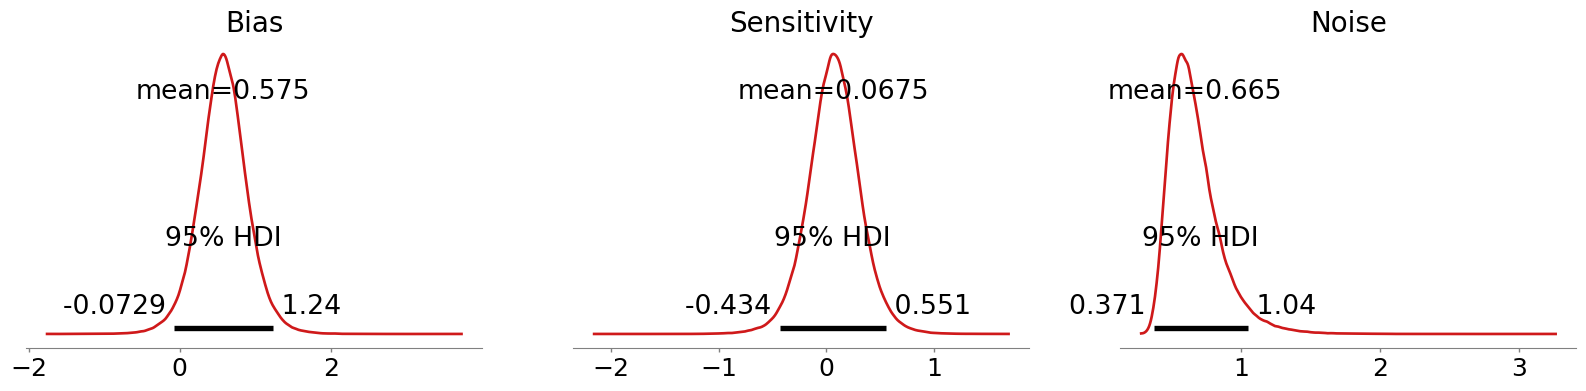

In [66]:
axes = az.plot_posterior(fit_time, var_names=para_list_names, figsize=(20, 4), kind='kde',
                        hdi_prob=0.95, textsize=18, point_estimate='mean', 
                        round_to=3, color = "#CF191A");

axes[0].set_title("Bias", size=20)
axes[1].set_title("Sensitivity", size=20)
axes[2].set_title("Noise", size=20)
plt.savefig(dir + "Posterior_Distributions_Time.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

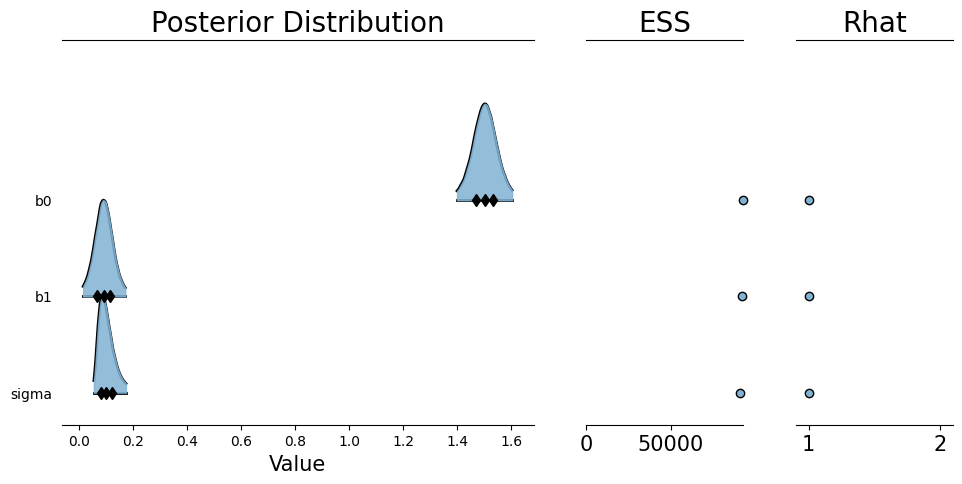

In [67]:
axes = az.plot_forest(fit, var_names=para_list_names, 
                      figsize=(11.5, 5), kind='ridgeplot', colors = '#81B2D4', 
                      ess=True, r_hat=True, combined=True, ridgeplot_overlap=1.35, 
                      textsize=15, hdi_prob=0.95, quartiles=True, linewidth=2, 
                      markersize=6, legend=True, ridgeplot_alpha= 0.85, 
                      ridgeplot_quantiles=[0.25, 0.5, 0.75], ridgeplot_truncate=True)

axes[0].set_title('Posterior Distribution', fontsize=20)
axes[0].set_xlabel('Value', fontsize=15)
axes[1].set_title('ESS', fontsize=20)
axes[2].set_title('Rhat', fontsize=20)

plt.savefig(dir + "Posterior_Distributions_and_statistics_Responses.png", 
            dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

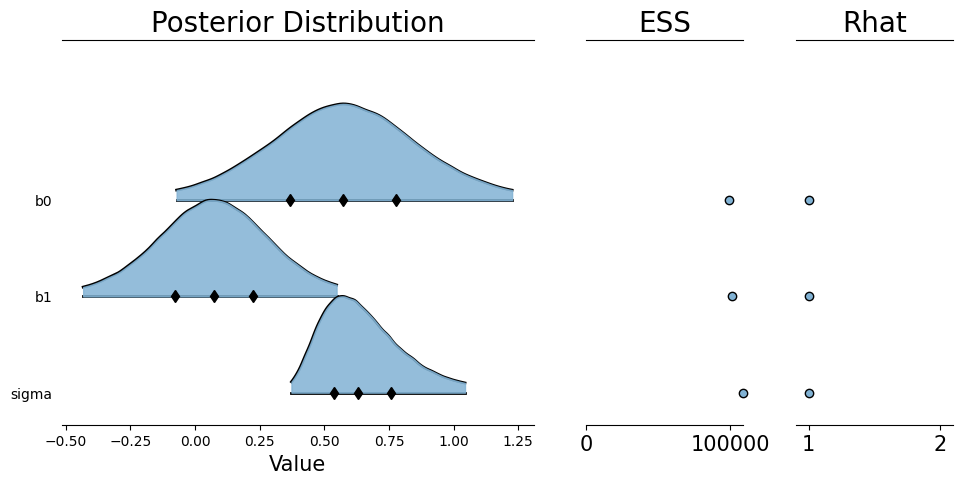

In [68]:
axes = az.plot_forest(fit_time, var_names=para_list_names, 
                      figsize=(11.5, 5), kind='ridgeplot', colors = '#81B2D4', 
                      ess=True, r_hat=True, combined=True, ridgeplot_overlap=1.35, 
                      textsize=15, hdi_prob=0.95, quartiles=True, linewidth=2, 
                      markersize=6, legend=True, ridgeplot_alpha= 0.85, 
                      ridgeplot_quantiles=[0.25, 0.5, 0.75], ridgeplot_truncate=True)

axes[0].set_title('Posterior Distribution', fontsize=20)
axes[0].set_xlabel('Value', fontsize=15)
axes[1].set_title('ESS', fontsize=20)
axes[2].set_title('Rhat', fontsize=20)

plt.savefig(dir + "Posterior_Distributions_and_statistics_Time.png", 
            dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

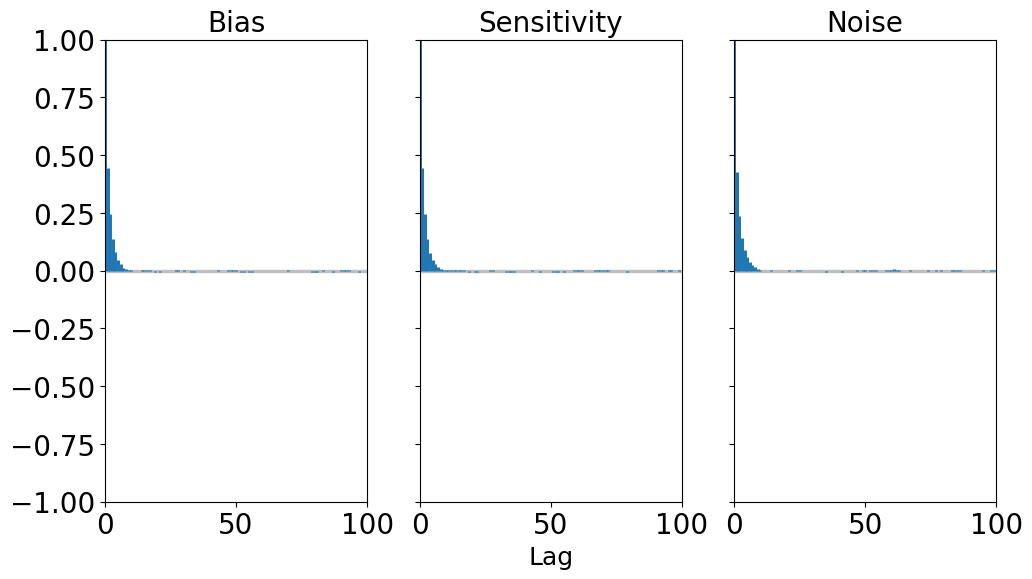

In [69]:
axes = az.plot_autocorr(fit, var_names=para_list_names, figsize=(11.5, 6),
                         combined=True, textsize=20, max_lag=100);

axes[0].set_title('Bias', fontsize=20)
axes[1].set_title('Sensitivity', fontsize=20)
axes[2].set_title('Noise', fontsize=20)
axes[1].set_xlabel('Lag', fontsize=18)

plt.savefig(dir + "Autocorrelation_Responses.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

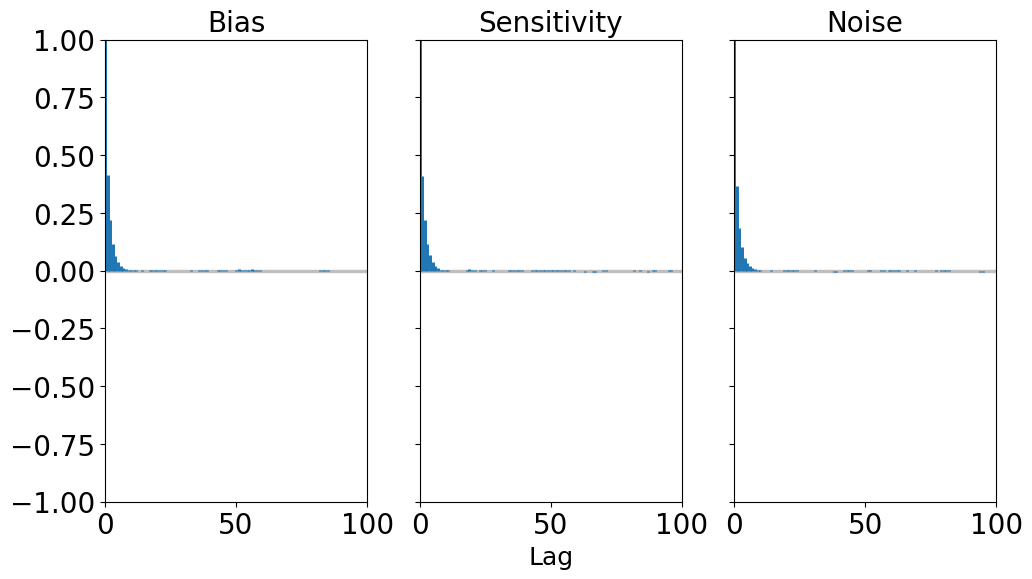

In [70]:
axes = az.plot_autocorr(fit_time, var_names=para_list_names, figsize=(11.5, 6),
                         combined=True, textsize=20, max_lag=100);

axes[0].set_title('Bias', fontsize=20)
axes[1].set_title('Sensitivity', fontsize=20)
axes[2].set_title('Noise', fontsize=20)
axes[1].set_xlabel('Lag', fontsize=18)

plt.savefig(dir + "Autocorrelation_Time.png", dpi = 300, bbox_inches='tight', pad_inches=0.1)
plt.show()

/home/quicho/Escritorio/Matching/.venv/lib/python3.11/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


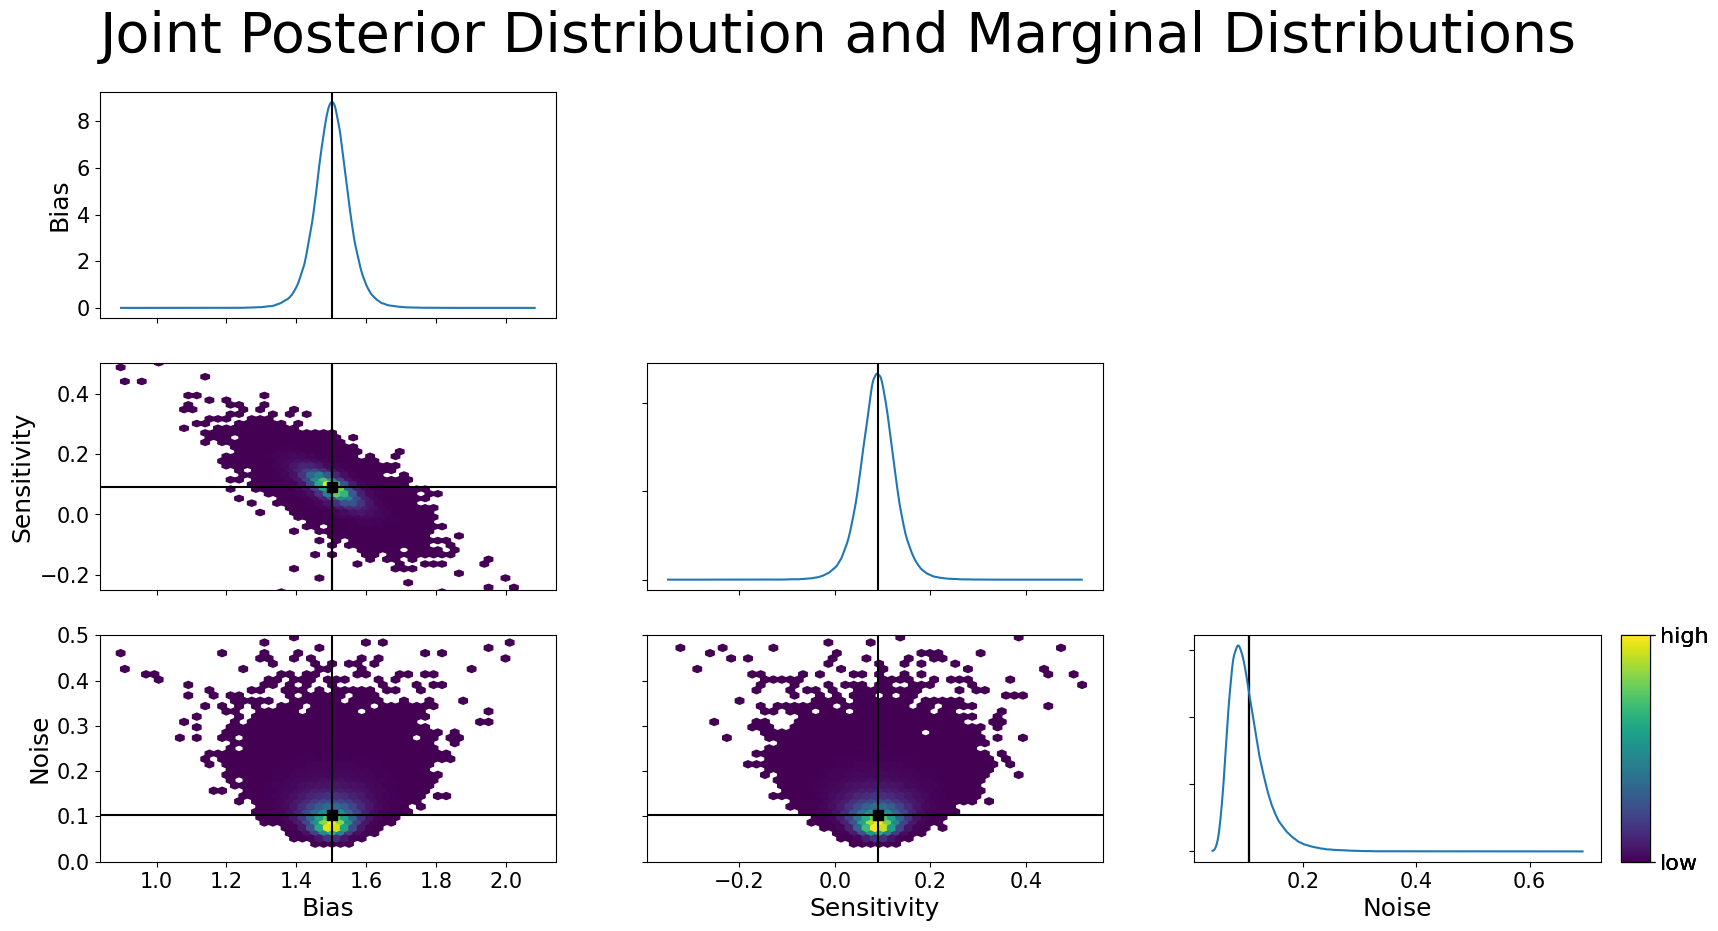

In [75]:
axes = az.plot_pair(fit, var_names=para_list_names, figsize=(20, 10), 
                    divergences=True, kind='hexbin', textsize=15, colorbar=True, point_estimate='mean', marginals=True)

axes[1, 0].set_ylim(-0.25, 0.5)
axes[2, 0].set_ylim(0, 0.5)
axes[0,0].set_title("Joint Posterior Distribution and Marginal Distributions", fontsize=40, pad=20, loc = "left", verticalalignment="bottom")
axes[0, 0].set_ylabel('Bias', fontsize=18)
axes[1, 0].set_ylabel('Sensitivity', fontsize=18)
axes[2, 0].set_ylabel('Noise', fontsize=18)
axes[2, 0].set_xlabel('Bias', fontsize=18)
axes[2, 1].set_xlabel('Sensitivity', fontsize=18)
axes[2, 2].set_xlabel('Noise', fontsize=18)

plt.savefig(dir + "Joint_Posterior_Distribution_and_Marginal_Distributions_Responses.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

/home/quicho/Escritorio/Matching/.venv/lib/python3.11/site-packages/arviz/plots/pairplot.py:223: UserWarning: Divergences data not found, plotting without divergences. Make sure the sample method provides divergences data and that it is present in the `diverging` field of `sample_stats` or `sample_stats_prior` or set divergences=False
  warnings.warn(


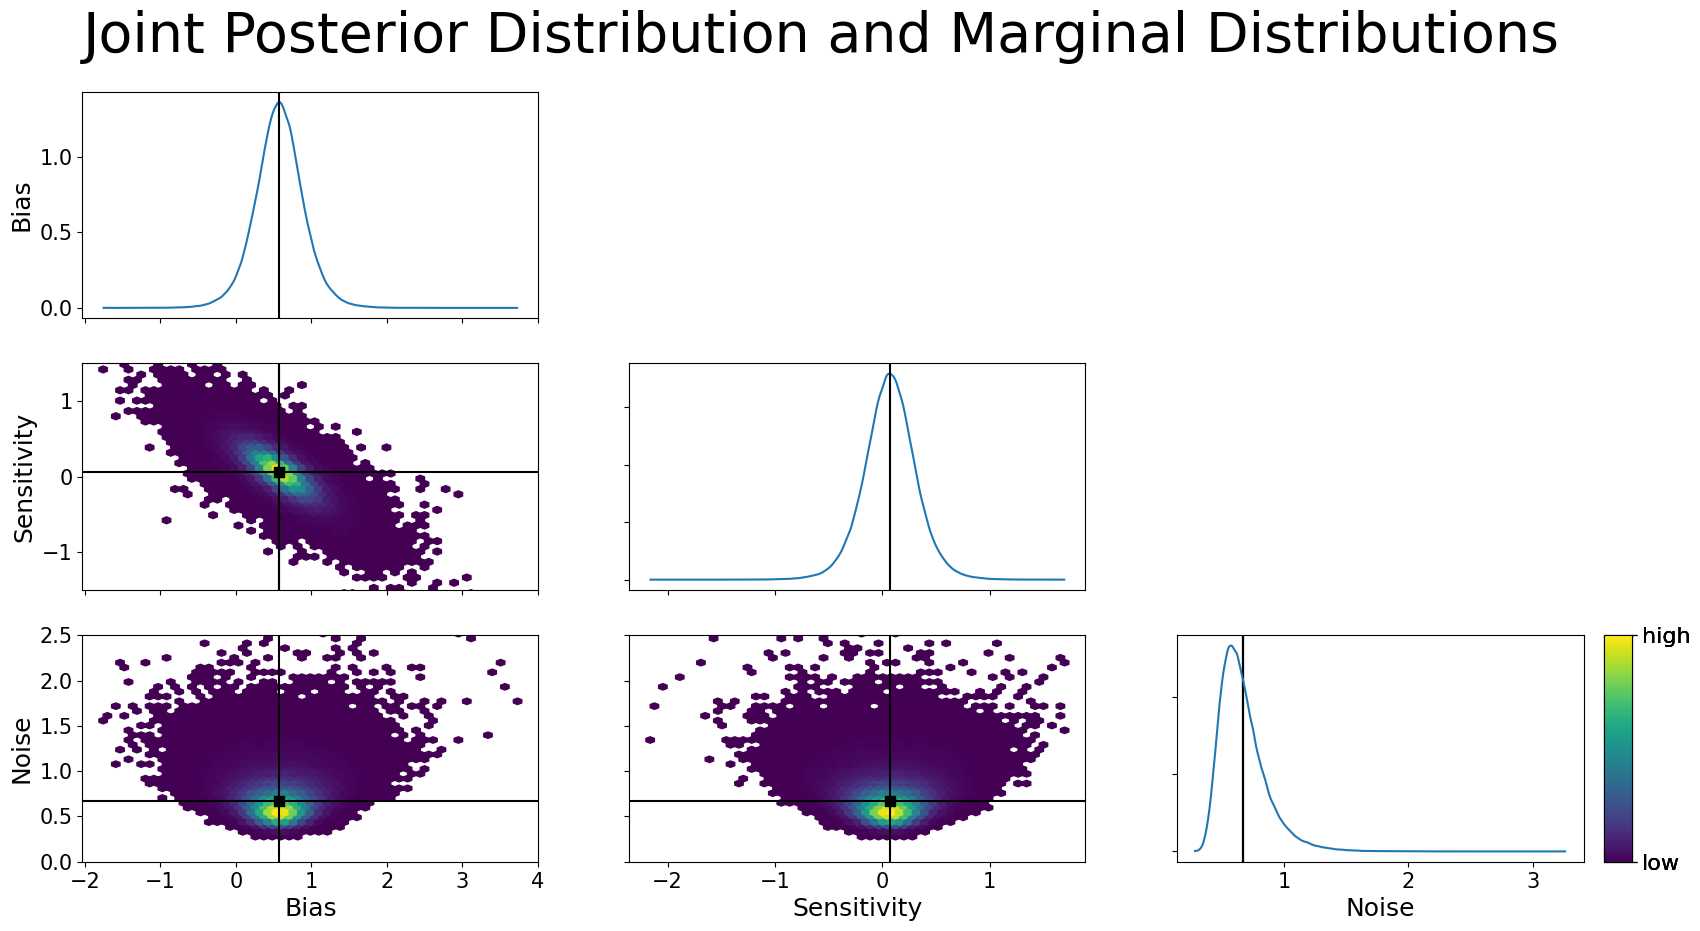

In [80]:
axes = az.plot_pair(fit_time, var_names=para_list_names, figsize=(20, 10), 
                    divergences=True, kind='hexbin', textsize=15, colorbar=True, point_estimate='mean', marginals=True)

axes[1, 0].set_ylim(-1.5, 1.5)
axes[2, 0].set_ylim(0, 2.5)
axes[0,0].set_title("Joint Posterior Distribution and Marginal Distributions", fontsize=40, pad=20, loc = "left", verticalalignment="bottom")
axes[0, 0].set_ylabel('Bias', fontsize=18)
axes[1, 0].set_ylabel('Sensitivity', fontsize=18)
axes[2, 0].set_ylabel('Noise', fontsize=18)
axes[2, 0].set_xlabel('Bias', fontsize=18)
axes[2, 1].set_xlabel('Sensitivity', fontsize=18)
axes[2, 2].set_xlabel('Noise', fontsize=18)

plt.savefig(dir + "Joint_Posterior_Distribution_and_Marginal_Distributions_Time.png", dpi = 450, bbox_inches='tight', pad_inches=0.1)
plt.show()

## Posterior Predictive Check

In [81]:
print("Response Parameters", "\n")
bayes[['b0', 'b1', 'sigma']].describe().T

Response Parameters 



,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
b0,280000.0,1.501762,0.051840,0.897013,1.470860,1.501818,1.532639,2.083752
b1,280000.0,0.089685,0.039262,-0.350073,0.066340,0.089660,0.113022,0.518049
sigma,280000.0,0.104103,0.035164,0.039886,0.080108,0.096772,0.119370,0.694091


In [82]:
print("Time Parameters", "\n")
bayes_time[['b0', 'b1', 'sigma']].describe().T

Time Parameters 



,count,mean,std,min,25%,50%,75%,max
parameters,,,,,,,,
b0,280000.0,0.575059,0.326830,-1.759898,0.374077,0.574126,0.774692,3.729868
b1,280000.0,0.067478,0.246725,-2.162577,-0.084103,0.067877,0.219701,1.696918
sigma,280000.0,0.665215,0.190353,0.276550,0.533604,0.628913,0.754772,3.264815


In [88]:
b0 = bayes["b0"].to_numpy()
b1 = bayes["b1"].to_numpy()
samples = 80

np.random.seed(140801)
b0_samples = np.random.choice(b0, size=samples, replace=False)
np.random.seed(140801)
b1_samples = np.random.choice(b1, size=samples, replace=False)

b0_hdi = az.hdi(b0, hdi_prob=0.95)
b1_hdi = az.hdi(b1, hdi_prob=0.95)

b0_time = bayes_time["b0"].to_numpy()
b1_time = bayes_time["b1"].to_numpy()

np.random.seed(140801)
b0_samples_time = np.random.choice(b0_time, size=samples, replace=False)
np.random.seed(140801)
b1_samples_time = np.random.choice(b1_time, size=samples, replace=False)

b0_hdi_time = az.hdi(b0_time, hdi_prob=0.95)
b1_hdi_time = az.hdi(b1_time, hdi_prob=0.95)

x_hat = np.linspace(-1, 2.5, 10000)
y_hat = x_hat * b1_samples[:, None] + b0_samples[:, None]
y_hat_time = x_hat * b1_samples_time[:, None] + b0_samples_time[:, None]

In [84]:
# PLot colors
sample_color = "#DF96B4"
hdi_color = "#717171"
data_color = "#244B7A"
alpha_samples = 0.4

sample_color_time = "#B0DB61"
hdi_color_time = "#FF0000"
data_color_time = "#2B5C8A"
alpha_samples_time = 0.4

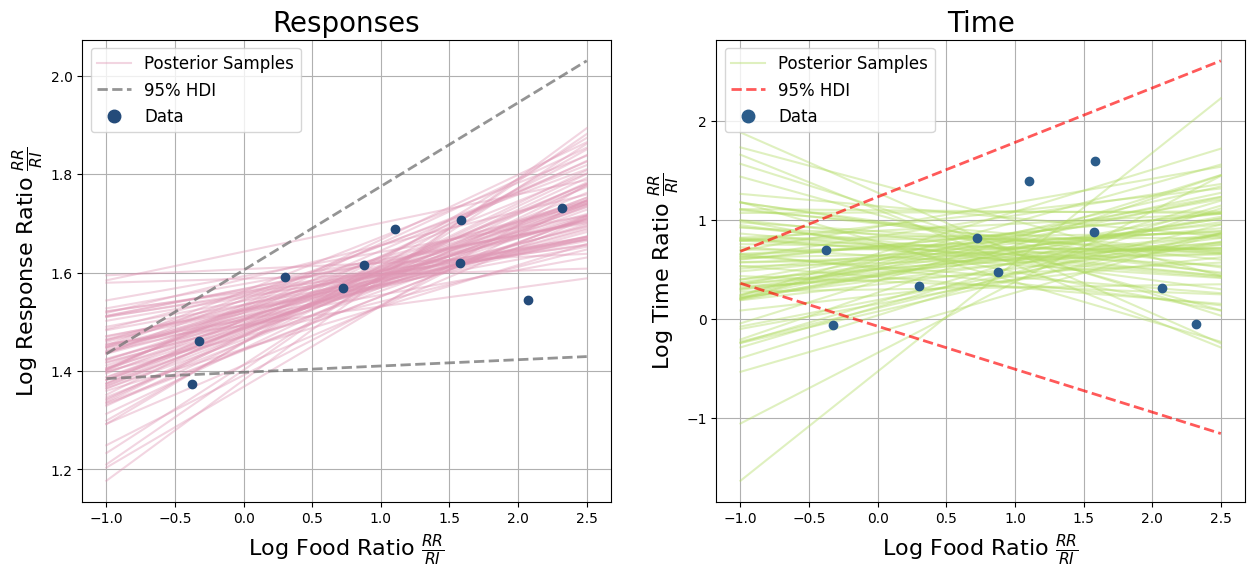

In [89]:
fig, ax = plt.subplots(figsize = (15, 6), ncols=2, nrows=1)

# Plot Response
################################################################################################################################################################################################################################################################################################
# Plot Posterior samples
for i in range(samples-1):
    ax[0].plot(x_hat, y_hat[i], alpha=alpha_samples, color = sample_color)
ax[0].plot(x_hat, y_hat[-1], alpha=alpha_samples, color = sample_color, label = r"Posterior Samples")

# Plot Posterior 95% HDI
ax[0].plot(x_hat, x_hat * b1_hdi[0] + b0_hdi[0], '--', alpha = 0.75, color = hdi_color, 
        lw = 2, label = r"95% HDI")
ax[0].plot(x_hat, x_hat * b1_hdi[1] + b0_hdi[1], '--', alpha = 0.75, color = hdi_color, 
        lw = 2)

# PLot Data
ax[0].plot(list_rewards, ratio_RR_RI_response_list, 'o', alpha = 1, color = data_color, label = r"Data")


ax[0].grid()

ax[0].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_ylabel(r'Log Response Ratio $\frac{RR}{RI}$', fontsize=16)
ax[0].set_title(f"Responses", fontsize=20)
ax[0].legend(markerscale=1.5, fontsize=12)

# Plot TIme
################################################################################################################################################################################################################################################################################################

# Plot Posterior samples
for i in range(samples-1):
    ax[1].plot(x_hat, y_hat_time[i], alpha=alpha_samples, color = sample_color_time)
ax[1].plot(x_hat, y_hat_time[-1], alpha=alpha_samples, color = sample_color_time, 
           label = r"Posterior Samples")

# Plot Posterior 95% HDI
ax[1].plot(x_hat, x_hat * b1_hdi_time[0] + b0_hdi_time[0], '--', 
           alpha = 0.65, color = hdi_color_time,  lw = 2, label = r"95% HDI")
ax[1].plot(x_hat, x_hat * b1_hdi_time[1] + b0_hdi_time[1], '--', 
           alpha = 0.65, color = hdi_color_time, lw = 2)

# PLot Data
ax[1].plot(list_rewards, list_times, 'o', alpha = 1, color = data_color_time, 
           label = r"Data")


ax[1].grid()

ax[1].set_xlabel(r'Log Food Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_ylabel(r'Log Time Ratio $\frac{RR}{RI}$', fontsize=16)
ax[1].set_title(f"Time", fontsize=20)
ax[1].legend(markerscale=1.5, fontsize=12)


plt.savefig(dir + "Predictive_Posterior_Checking_2016.png", dpi = 300, 
            bbox_inches='tight', pad_inches=0.1)
plt.show()
plt.close(fig)